In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [16]:
df = pd.read_spss('data/CASPIANI.sav',convert_categoricals=True)  
df_iii = pd.read_spss('data/CASPIAN III.sav',convert_categoricals=True) 
df_iv = pd.read_spss('data/caspian4_.sav',convert_categoricals=True)
df_v = pd.read_spss('data/last-caspian-v.sav',convert_categoricals=True) 

In [17]:
def rename_features(df1, caspian_number):
    df2 = df1.copy()
    # Rename the features in the dataframe
    if caspian_number == 5:
        df2.rename(columns={'weight_1': 'weight', 'height_2': 'height', 'universi': 'university','ap_9':'schoolType'}, inplace=True)
    elif caspian_number == 4:
        df2.drop('sex', axis=1, inplace=True)
        print(df2.columns)
        df2.rename(columns={'sex2': 'sex', 'weight_1': 'weight', 'height_2': 'height', 'University': 'university','ap_9':'schoolType'}, inplace=True)
    elif caspian_number == 3:
        df2.rename(columns={'weighte': 'weight', 'heighte': 'height', 'province': 'university', 'area':'region','p9':'schoolType'}, inplace=True)
    elif caspian_number == 1:
        df2.columns = df.columns.str.lower()
        df2.rename(columns={'univer': 'university','district':'region', 'schoolty':'schoolType'}, inplace=True)
        

    return df2


In [18]:
df = rename_features(df,1)
df_iv=rename_features(df_iv,4)
df_iii = rename_features(df_iii,3)
df_v = rename_features(df_v,5)


Index(['id2', 'University', 'region', 'cluster', 'cross', 'birth_ye',
       'sample_c', 'a_1', 'a_2', 'a_3',
       ...
       'HeiMeter', 'bmi', 'CATBMI', 'CATBMIoutlieer', 'dicBMI',
       'socialsupport', 'PA1', 'PA2', 'KVDM', 'obes'],
      dtype='object', length=410)


In [19]:
df['schoolType'].value_counts()

schoolType
Public School     4394
Private School     417
Name: count, dtype: int64

In [20]:
df_v['schoolType'].value_counts()

schoolType
dolati            13072
gheyre entefai     1110
Name: count, dtype: int64

In [21]:
df['sex'] = df['sex'].apply(lambda x: 'Girl' if x == 'Female' else 'Boy' if x == 'Male' else x)
df['region'] = df['region'].apply(lambda x: 'urban' if x == 'Urban' else 'rural' if x == 'Rural' else x)
df_iii['sex'] = df_iii['sex'].apply(lambda x: 'Girl' if x == 'female' else 'Boy' if x == 'male' else x)
df_iv['sex'] = df_iv['sex'].apply(lambda x: 'Girl' if x == 'girl' else 'Boy' if x == 'boy' else x)
df_iii['schoolType']=df_iii['schoolType'].apply(lambda x: 'Public School' if x=='dolati' else 'Private School' if x=='gheyre entefaei' else 'Unknown') 
df_iv['schoolType']=df_iv['schoolType'].apply(lambda x: 'Public School' if x=='dolati' else 'Private School' if x=='gheyre entef' else 'Unknown') 
df_v['schoolType']=df_v['schoolType'].apply(lambda x: 'Public School' if x=='dolati' else 'Private School' if x=='gheyre entefai' else 'Unknown') 


In [22]:
df_dict = {'caspian_I': df, 'caspian_III': df_iii, 'caspian_IV': df_iv, 'caspian_V': df_v}

shape of each dataset


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample function that returns the shape of the DataFrame
def dataframe_info(df_dict):
    save_folder = 'charts/base_charts'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    table_data = []
    for name, df in df_dict.items():
        shape = df.shape
        table_data.append([name, shape[0], shape[1]])  # [Dataset Name, Rows, Columns]
        table_df = pd.DataFrame(table_data, columns=['Dataset Name', 'Number of subjects', 'Number of features'])

        # Plot the table using matplotlib
        fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figsize for readability
        ax.axis('off')  # Hide axes

        # Render table
        table = ax.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.auto_set_column_width(col=list(range(len(table_df.columns))))

        # Save the table as an image
        plot_path = os.path.join(save_folder, "datasets_shape.png")
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        # plt.show()
        plt.close()

dataframe_info(df_dict)
 

number of boys and girls in each data set

first we change all value of sex for all dataframes to have a same value for sex column:

now we draw charts for compare distribution of Girls and Boys in each dataframe:


In [24]:
# Function to combine and plot counts
def plot_gender_counts(dataframes_dict, filename="gender_counts_plot.png"):
    # List to store counts for each dataset
    save_folder = 'charts/base_charts'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    combined_data = []

    # Iterate over each dataframe and compute counts
    for name, df in dataframes_dict.items():
        # print(type(df))
        counts = df['sex'].value_counts().reset_index()
        counts.columns = ['sex', 'count']
        counts['dataset'] = name  # Use the name from the dictionary as dataset label
        combined_data.append(counts)
    
    # Concatenate all counts into a single DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)

    # Plot with seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=combined_df, x='dataset', y='count', hue='sex')
    plt.title('Number of Boys and Girls Across Datasets')
    plt.xlabel('Dataset')
    plt.ylabel('Count')
    plot_path = os.path.join(save_folder, filename)
    plt.savefig(plot_path,bbox_inches='tight', dpi=300)
    # plt.show()
    plt.close()

# Usage
plot_gender_counts(df_dict)


In [25]:
# Function to plot counts by age for each dataset
def plot_gender_age_distribution(dataframes_dict):
    save_folder = 'charts/base_charts'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for name, df in dataframes_dict.items():
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x='age', hue='sex')
        plt.title(f'Gender Distribution by Age in {name}')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.legend(title='Gender', labels=['Boy', 'Girl'])
        plot_path = os.path.join(save_folder, f"{name}_gender_age_distribution.png")
        plt.savefig(plot_path,bbox_inches='tight', dpi=300)
        # plt.show()
        plt.close()

# Usage
plot_gender_age_distribution(df_dict)


add a preprocessing step for additional works

In [26]:
def preprocess(dataframes_dict):
    processed_dfs = {}  # Dictionary to store processed DataFrames
    for name, df_org in dataframes_dict.items():
        df = df_org.copy()

        # Filter age
        df = df[(df["age"] >= 7) & (df["age"] <= 18)]
        # please change the type of heught_1 and weight_1 in caspian4 to numeric if you can't do it directly uncomment two line below
        df['height'] = pd.to_numeric(df['height'], errors='coerce')
        df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
        df["bmi1"] = df["weight"] / ((df["height"] / 100) ** 2)
        
        # Remove null tuples
        records_with_nulls = df[
            df[["weight", "height", "sex", "age"]].isna().any(axis=1)
        ]
        df = df.dropna(subset=["height", "weight", "sex"])
        print(
            f"Number of records with NaN value in weight or height in {name}: {len(records_with_nulls)}"
        )

        # Store the processed DataFrame in the new dictionary
        processed_dfs[name] = df

    return processed_dfs


# Usage
processed_dfs = preprocess(df_dict)

Number of records with NaN value in weight or height in caspian_I: 11
Number of records with NaN value in weight or height in caspian_III: 0
Number of records with NaN value in weight or height in caspian_IV: 143
Number of records with NaN value in weight or height in caspian_V: 128


check if our bmi is equal to dataset bmi or not
bmi1 is our bmi and bmi is dataset bmi:
result is:
Only the Caspian IV dataset shows a difference between our BMI (bmi1) and the dataset BMI (bmi); all other datasets have matching BMI values.

In [27]:
import numpy as np

# Identify rows where 'bmi' and 'bmi1' are not close within a small tolerance
differences = processed_dfs['caspian_V'][~np.isclose(processed_dfs['caspian_V']['bmi'], processed_dfs['caspian_V']['bmi1'], atol=1e-6)]

# Print only rows with significant differences
if not differences.empty:
    print(differences[['weight','height','bmi', 'bmi1']])
else:
    print("No significant differences found.")

No significant differences found.


In [28]:
def growth_chart(processed_dfs, feature, percentiles, sex, frec_rate):
    for name, preprocess_df in processed_dfs.items():
        def calculate_percentiles(group):
            return np.percentile(group[feature], percentiles)

        # Calculate percentiles
        percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
            lambda g: pd.Series(calculate_percentiles(g), index=[f'Percentile_{p}' for p in percentiles])
        )
        
        percentile_results.reset_index(inplace=True)
        
        if percentile_results.empty:
            print(f"No percentile results for {name} with feature {feature}")
            continue
        
        # Filter based on sex
        if sex == 'Boy':
            percentile_results_gender = percentile_results[percentile_results['sex'] == 'Boy']
            gender = "Boy"
        else:
            percentile_results_gender = percentile_results[percentile_results['sex'] == 'Girl']
            gender = "Girl"

        if percentile_results_gender.empty:
            print(f"No data for {gender} in {name} with feature {feature}")
            continue

        ages = percentile_results_gender['age']
        
        plt.figure(figsize=(12, 8))

        for i, percentile in enumerate(percentiles):
            percentile_data = percentile_results_gender[f'Percentile_{percentile}']

            # Ensure there’s data to plot
            if percentile_data.empty:
                print(f"No data for {percentile}th percentile for {gender} in {name}")
                continue
            
            # Fit LOESS model
            smoothed = sm.nonparametric.lowess(percentile_data, ages, frac=frec_rate)
            
            if smoothed.size == 0:
                print(f"No smoothed data for {percentile}th percentile for {gender} in {name}")
                continue
            
            # Plot the smoothed curve
            plt.plot(smoothed[:, 0], smoothed[:, 1], label=f'{percentile}th Percentile', color=plt.cm.plasma(i / len(percentiles)))
        
        plt.xlabel('Age')
        plt.ylabel(feature)
        plt.title(f'Growth Chart for {gender}')
        plt.legend()
        plt.grid(True)
        
        # Check that saving folder exists
        saving_folder = f'charts/{name}-smooth'
        if not os.path.exists(saving_folder):
            os.makedirs(saving_folder)
        
        # Save figure
        plt.savefig(f'{saving_folder}/{gender}-{feature}-age_smooth-{name}.png')
        plt.close()

        print(f"Chart saved for {gender} in {name} with feature {feature}")

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

def growth_chart(processed_dfs, feature, percentiles, sex):
    # Define a logarithmic function
    def log_func(x, a, b, c):
        return a * np.log(b * x) + c

    for name, preprocess_df in processed_dfs.items():
        def calculate_percentiles(group):
            return np.percentile(group[feature], percentiles)

        # Calculate percentiles
        percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
            lambda g: pd.Series(calculate_percentiles(g), index=[f'Percentile_{p}' for p in percentiles])
        )
        
        percentile_results.reset_index(inplace=True)
        
        if percentile_results.empty:
            print(f"No percentile results for {name} with feature {feature}")
            continue
        
        # Filter based on sex
        if sex == 'Boy':
            percentile_results_gender = percentile_results[percentile_results['sex'] == 'Boy']
            gender = "Boy"
        else:
            percentile_results_gender = percentile_results[percentile_results['sex'] == 'Girl']
            gender = "Girl"

        if percentile_results_gender.empty:
            print(f"No data for {gender} in {name} with feature {feature}")
            continue

        ages = percentile_results_gender['age']
        
        plt.figure(figsize=(12, 8))

        for i, percentile in enumerate(percentiles):
            percentile_data = percentile_results_gender[f'Percentile_{percentile}']

            # Ensure there’s data to plot
            if percentile_data.empty:
                print(f"No data for {percentile}th percentile for {gender} in {name}")
                continue
            
            try:
                # Fit the logarithmic model
                params, _ = curve_fit(log_func, ages, percentile_data, maxfev=10000)
                fitted_data = log_func(ages, *params)
                
                # Plot the fitted logarithmic curve
                plt.plot(ages, fitted_data, label=f'{percentile}th Percentile', color=plt.cm.plasma(i / len(percentiles)))
            
            except RuntimeError:
                print(f"Could not fit logarithmic model for {percentile}th percentile in {name}")
                continue

        plt.xlabel('Age')
        plt.ylabel(feature)
        plt.title(f'Growth Chart for {gender}')
        plt.legend()
        plt.grid(True)
        
        # Check that saving folder exists
        saving_folder = f'charts/{name}-smooth'
        if not os.path.exists(saving_folder):
            os.makedirs(saving_folder)
        
        # Save figure
        plt.savefig(f'{saving_folder}/{gender}-{feature}-age_smooth-{name}.png')
        plt.close()

        print(f"Chart saved for {gender} in {name} with feature {feature}")


In [35]:
# Define percentiles for each feature
percentile_settings = {
    'height': [3, 5, 10 , 25, 50, 75, 90, 95, 97],  # Percentiles for height
    'weight': [3, 5, 10 , 25, 50, 75, 90, 95, 97],  # Percentiles for weight
    'bmi1': [3, 5, 10 , 25, 50, 75, 85, 90, 95, 97]      # Different percentiles for BMI
}

# Define genders
genders = ['Boy', 'Girl']

# Fraction rate for LOESS smoothing
# window_size = 5
# Call the growth_chart function for each combination of feature and gender
for feature, percentiles in percentile_settings.items():
    for gender in genders:
        growth_chart(processed_dfs=processed_dfs, feature=feature, percentiles=percentiles, sex=gender)


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_I with feature height


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_III with feature height


/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Chart saved for Boy in caspian_IV with feature height


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_V with feature height


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_I with feature height


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_III with feature height


/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Chart saved for Girl in caspian_IV with feature height


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_V with feature height


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_I with feature weight


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_III with feature weight


/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Chart saved for Boy in caspian_IV with feature weight


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_V with feature weight


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_I with feature weight


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_III with feature weight


/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Chart saved for Girl in caspian_IV with feature weight


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_V with feature weight


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_I with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_III with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Chart saved for Boy in caspian_IV with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Boy in caspian_V with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_I with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_III with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Chart saved for Girl in caspian_IV with feature bmi1


/tmp/ipykernel_9933/3626433991.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/3626433991.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/home/atefe_hjn97/Documents/VScode/caspian_second/CASPIAN_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  resul

Chart saved for Girl in caspian_V with feature bmi1


In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

def growth_chart(processed_dfs, feature, percentiles, sex, span):
    for name, preprocess_df in processed_dfs.items():
        def calculate_percentiles(group):
            return np.percentile(group[feature], percentiles)

        # Calculate percentiles
        percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
            lambda g: pd.Series(calculate_percentiles(g), index=[f'Percentile_{p}' for p in percentiles])
        )
        
        percentile_results.reset_index(inplace=True)
        
        if percentile_results.empty:
            print(f"No percentile results for {name} with feature {feature}")
            continue
        
        # Filter based on sex
        if sex == 'Boy':
            percentile_results_gender = percentile_results[percentile_results['sex'] == 'Boy']
            gender = "Boy"
        else:
            percentile_results_gender = percentile_results[percentile_results['sex'] == 'Girl']
            gender = "Girl"

        if percentile_results_gender.empty:
            print(f"No data for {gender} in {name} with feature {feature}")
            continue

        ages = percentile_results_gender['age']
        
        plt.figure(figsize=(12, 8))

        for i, percentile in enumerate(percentiles):
            percentile_data = percentile_results_gender[f'Percentile_{percentile}']

            # Ensure there’s data to plot
            if percentile_data.empty:
                print(f"No data for {percentile}th percentile for {gender} in {name}")
                continue
            
            # Apply Exponential Moving Average Smoothing
            smoothed_data = percentile_data.ewm(span=span, adjust=False).mean()

            if smoothed_data.isna().all():
                print(f"No smoothed data for {percentile}th percentile for {gender} in {name}")
                continue
            
            # Plot the smoothed curve
            plt.plot(ages, smoothed_data, label=f'{percentile}th Percentile', color=plt.cm.plasma(i / len(percentiles)))
        
        plt.xlabel('Age')
        plt.ylabel(feature)
        plt.title(f'Growth Chart for {gender}')
        plt.legend()
        plt.grid(True)
        
        # Check that saving folder exists
        saving_folder = f'charts/{name}-smooth'
        if not os.path.exists(saving_folder):
            os.makedirs(saving_folder)
        
        # Save figure
        plt.savefig(f'{saving_folder}/{gender}-{feature}-age_smooth-{name}.png')
        # plt.close()

        print(f"Chart saved for {gender} in {name} with feature {feature}")


/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_I with feature height


/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_III with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_IV with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_V with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_I with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_III with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_IV with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_V with feature height


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_I with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_III with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_IV with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_V with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_I with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_III with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_IV with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_V with feature weight


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_I with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_III with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_IV with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Boy in caspian_V with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. 

Chart saved for Girl in caspian_I with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_III with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(
/tmp/ipykernel_9933/1962084634.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_IV with feature bmi1


/tmp/ipykernel_9933/1962084634.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = preprocess_df.groupby(['age', 'sex'], group_keys=False).apply(


Chart saved for Girl in caspian_V with feature bmi1


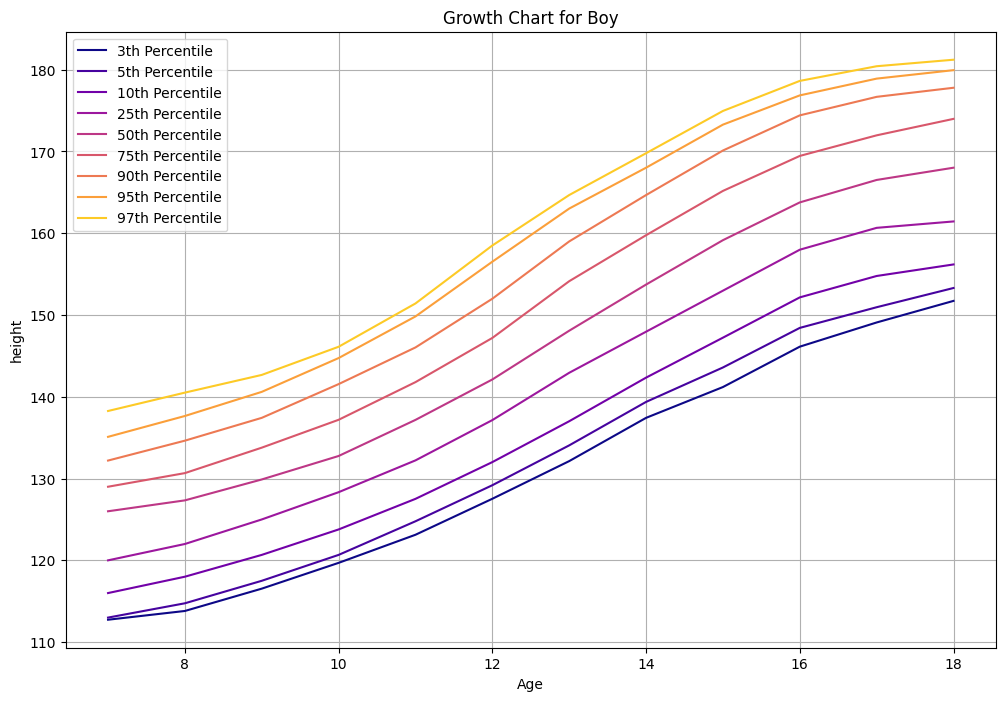

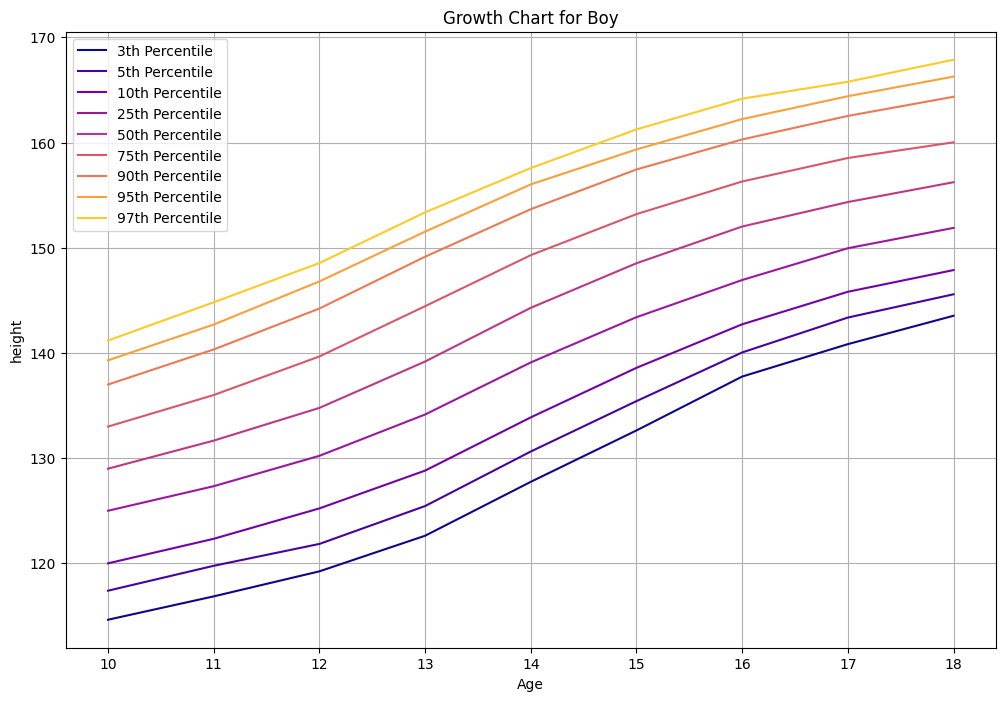

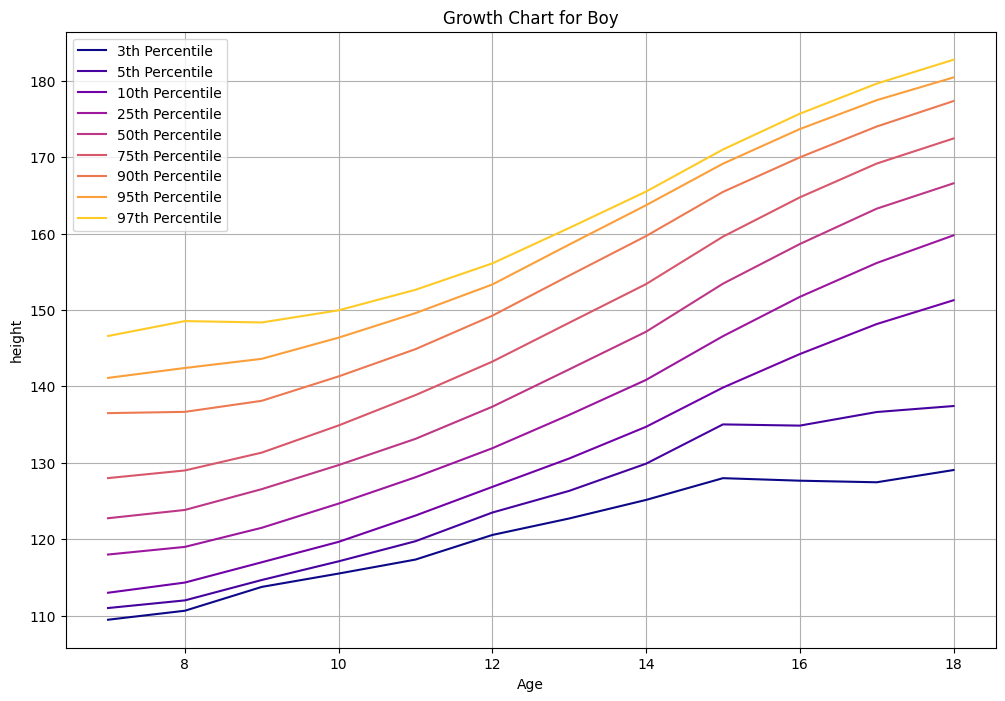

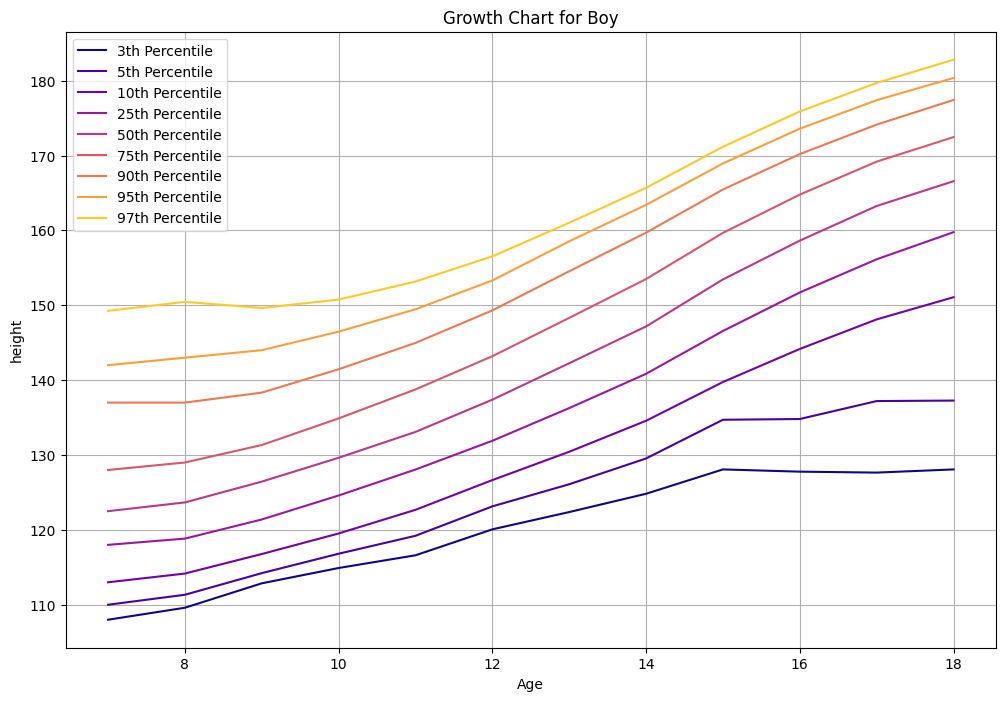

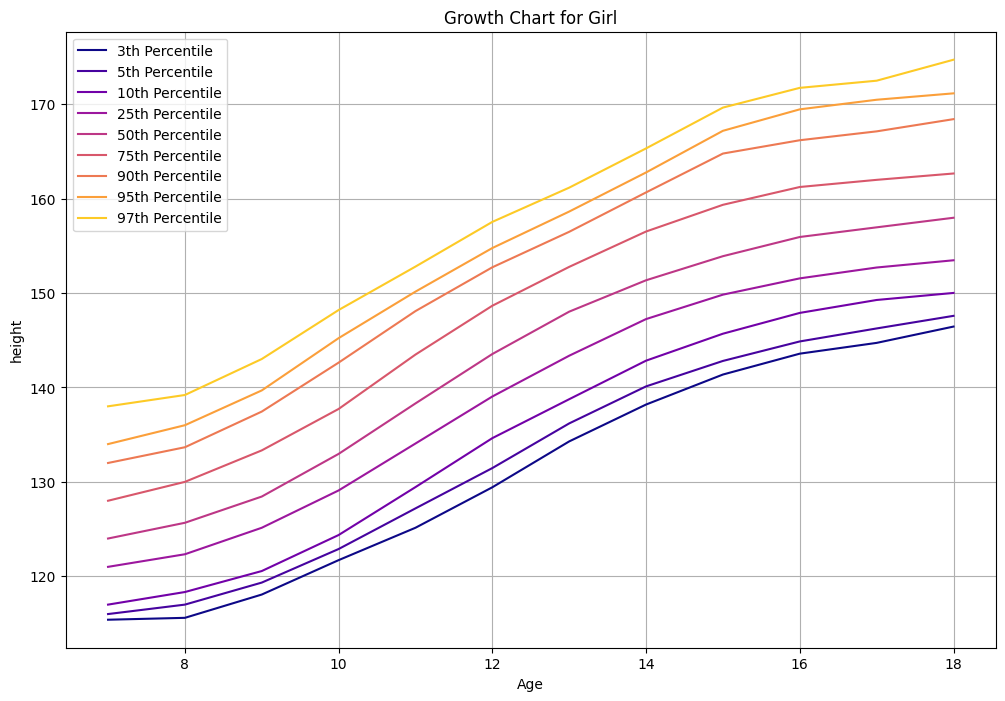

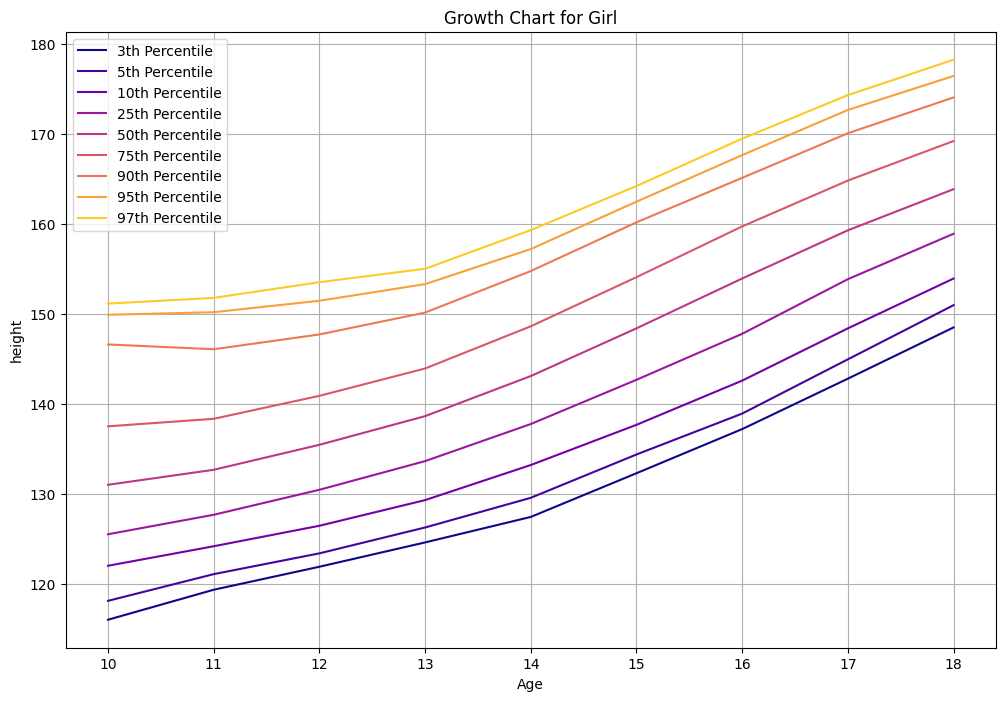

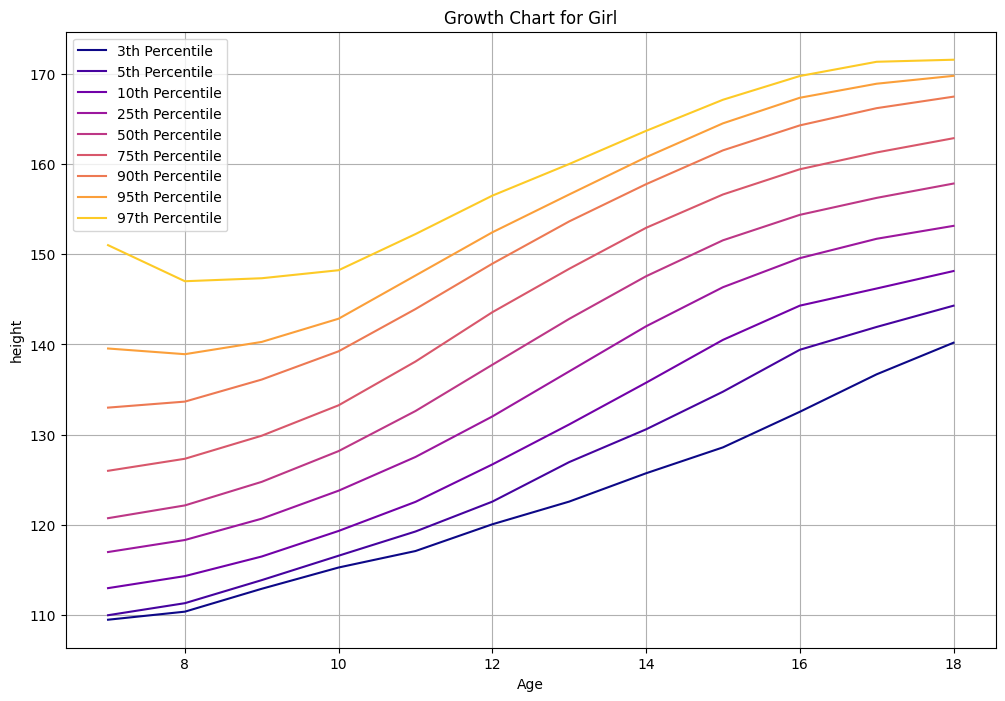

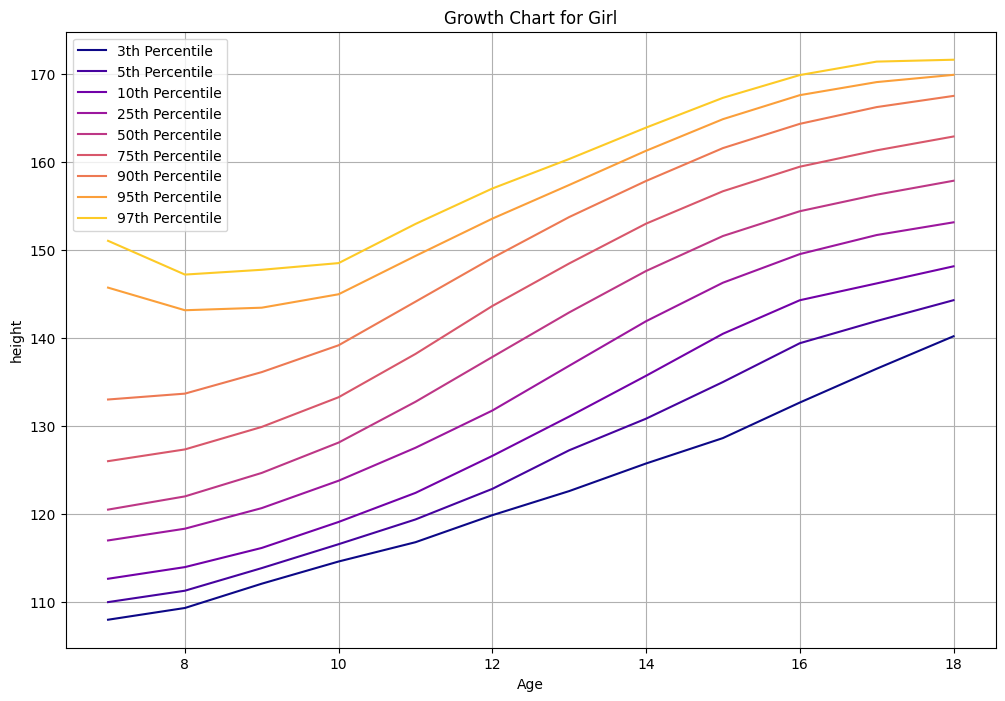

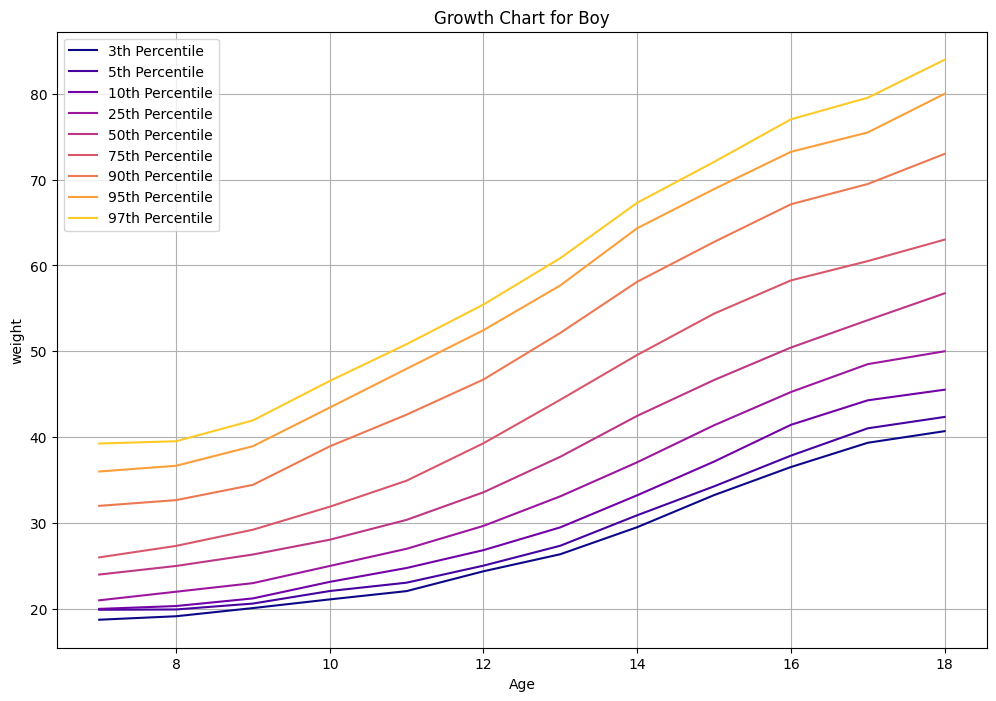

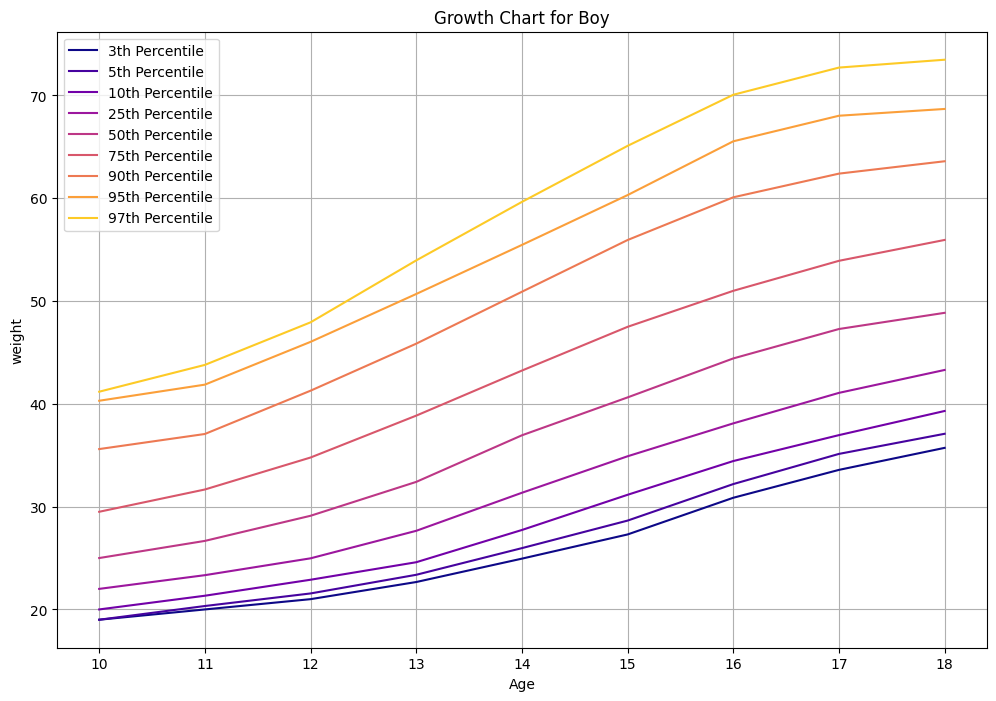

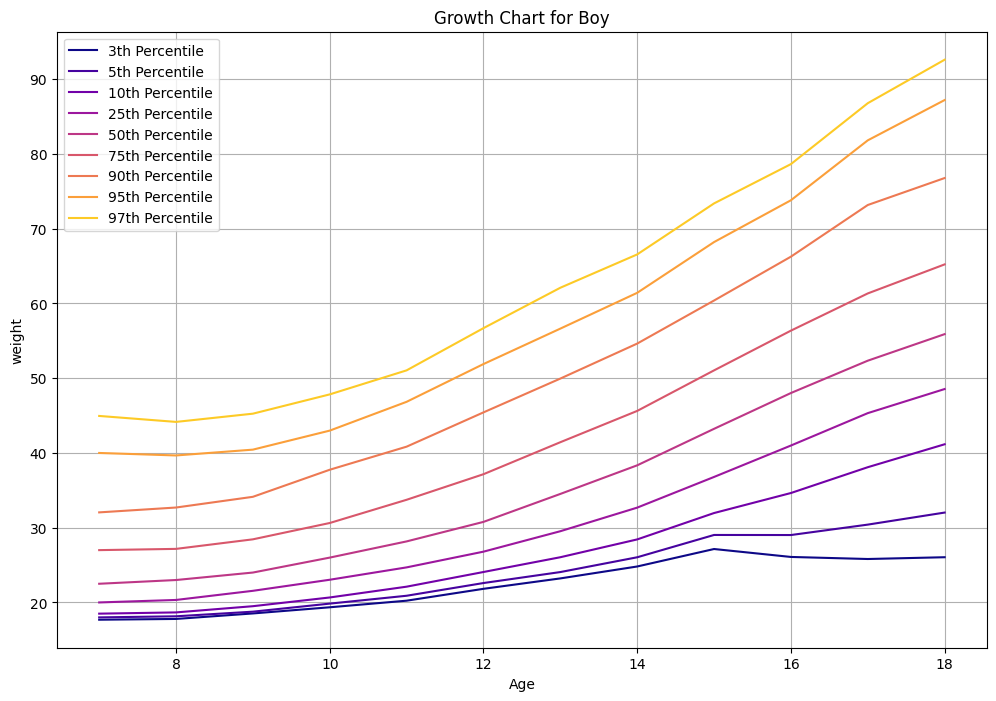

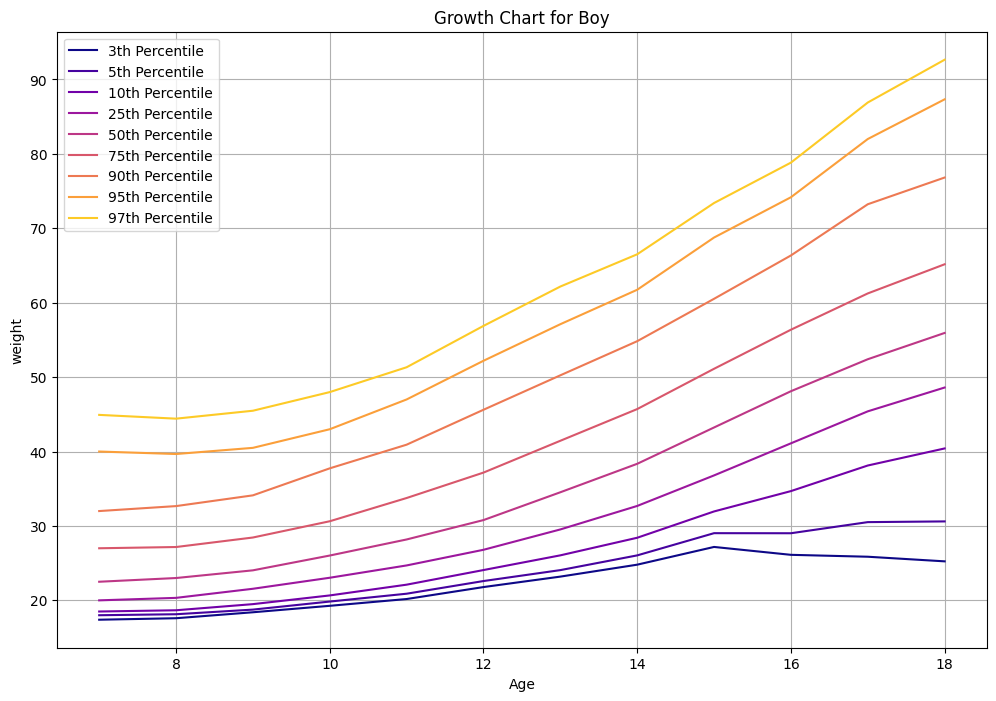

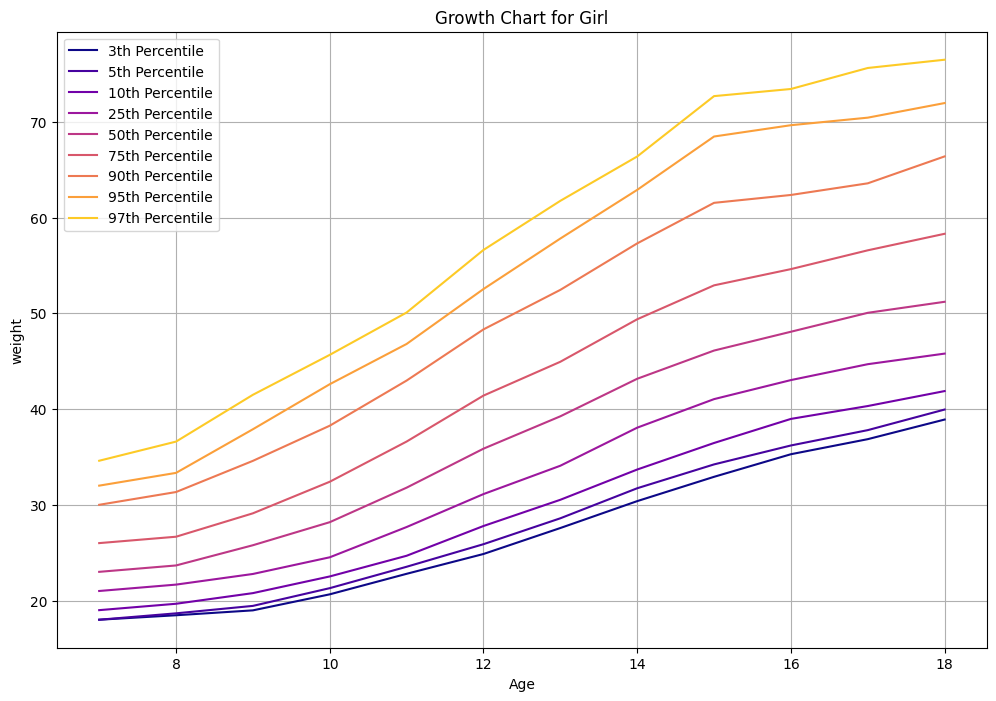

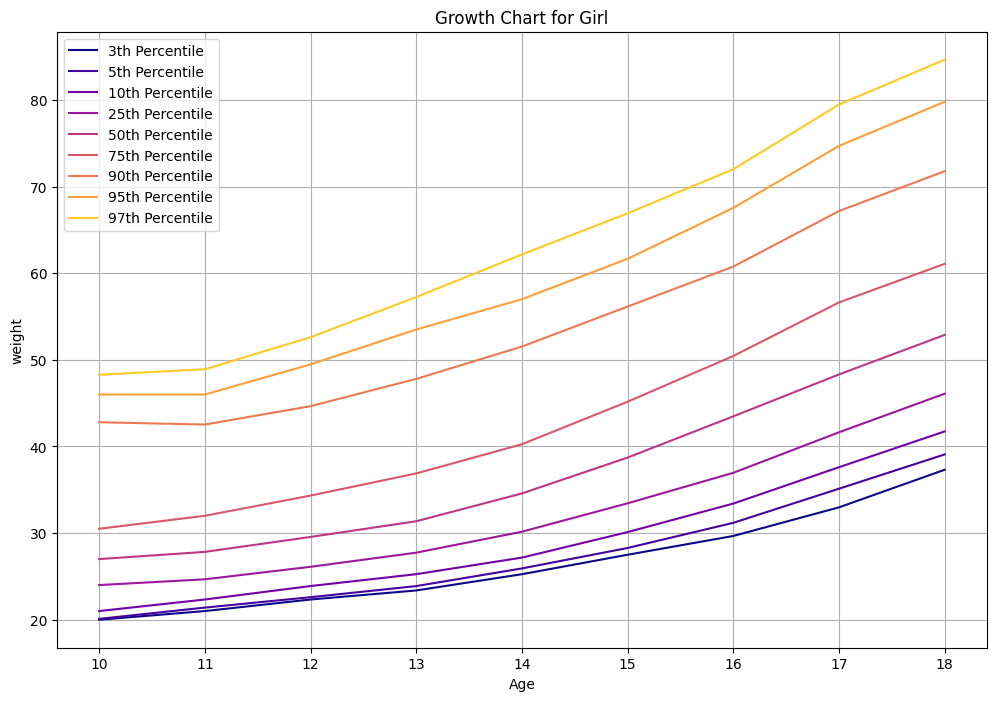

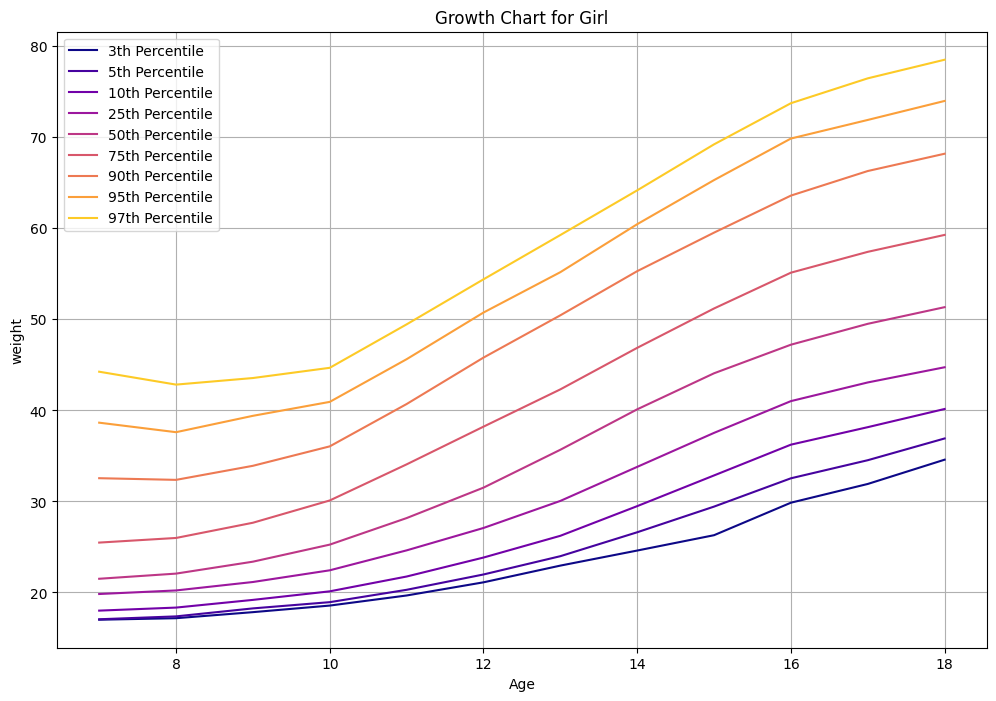

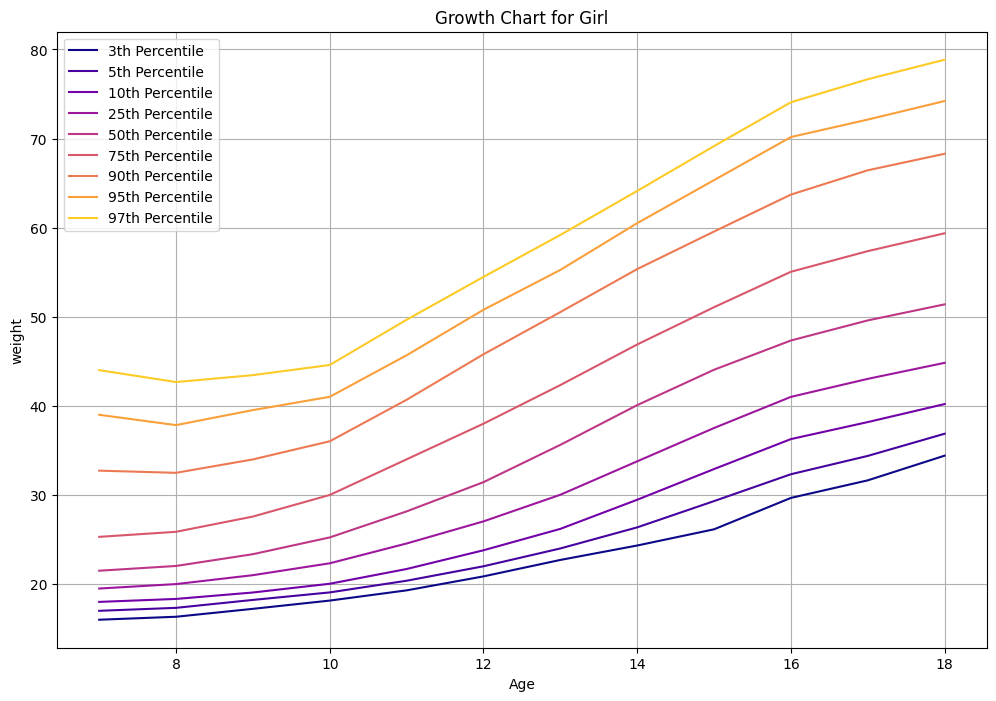

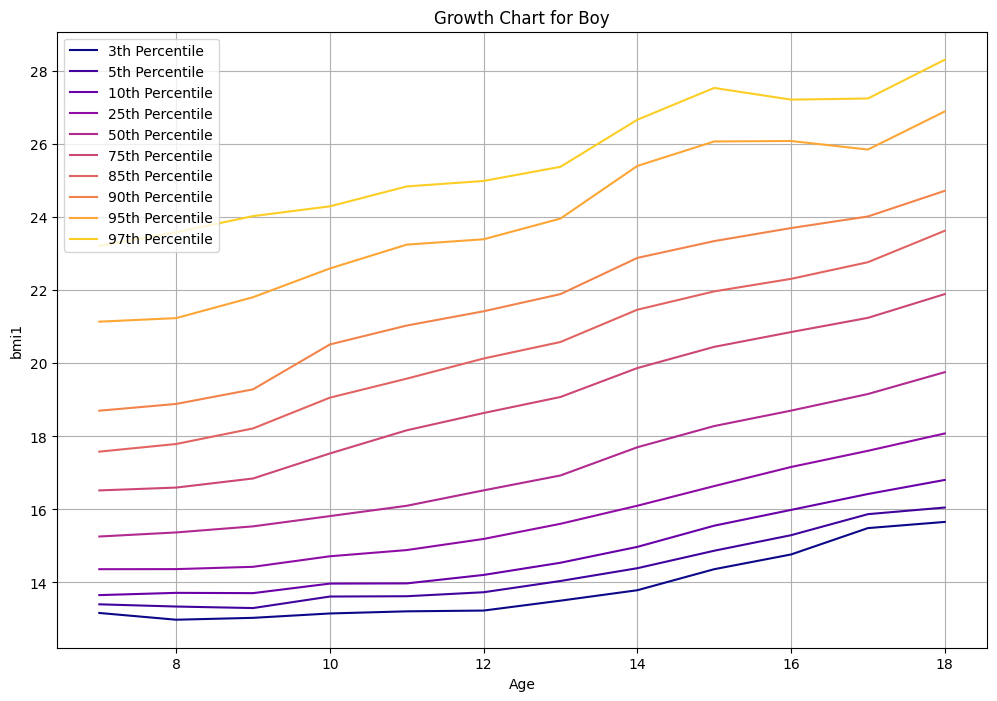

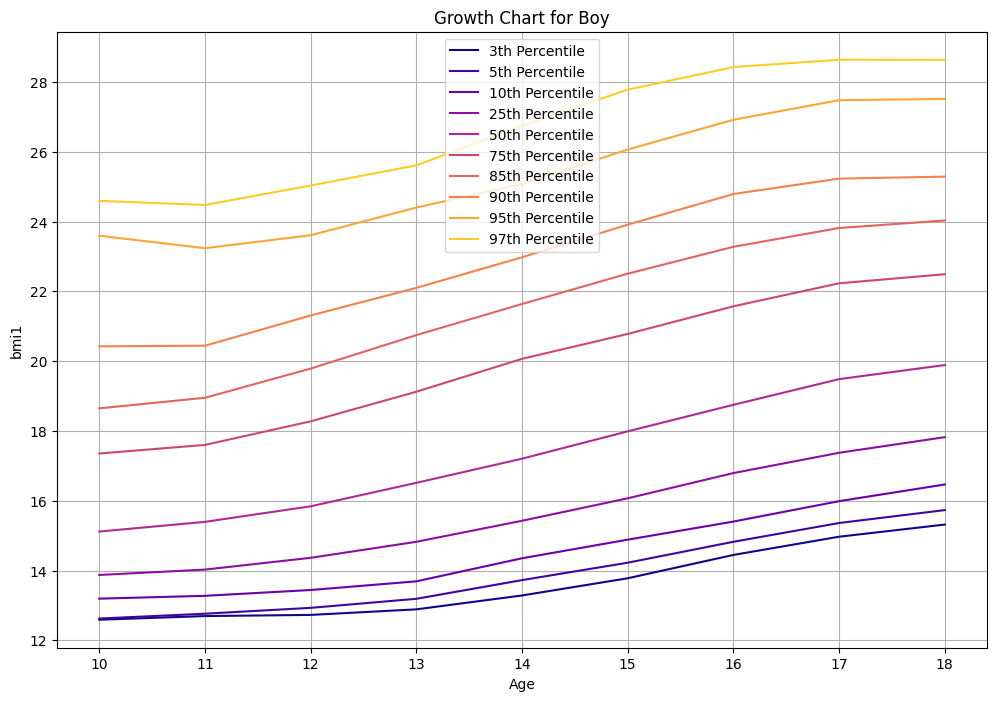

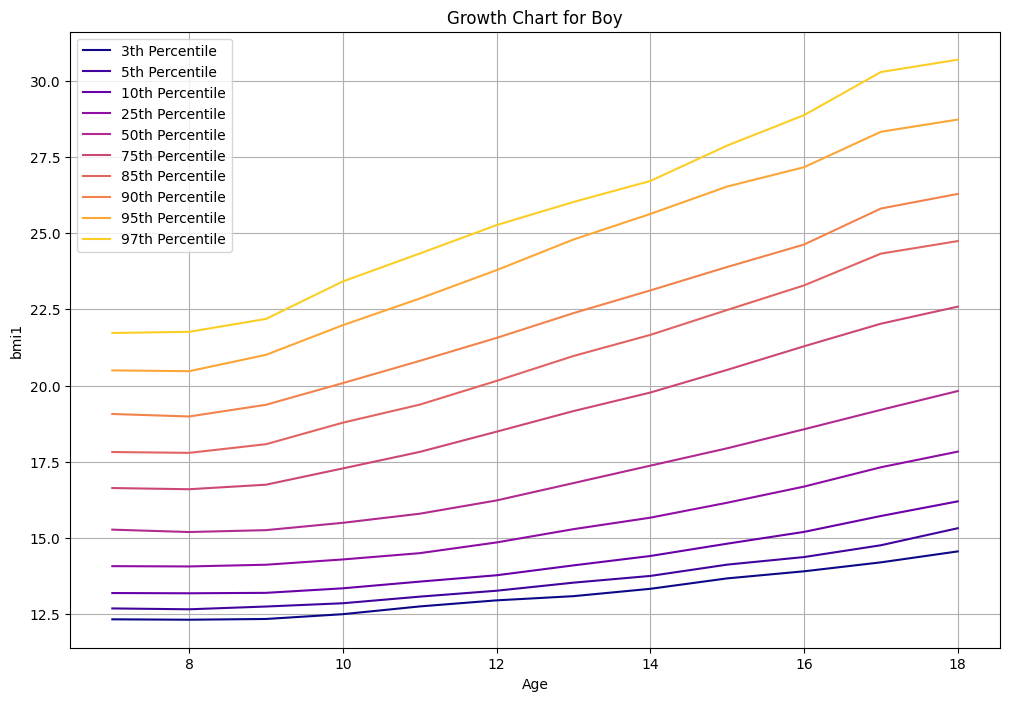

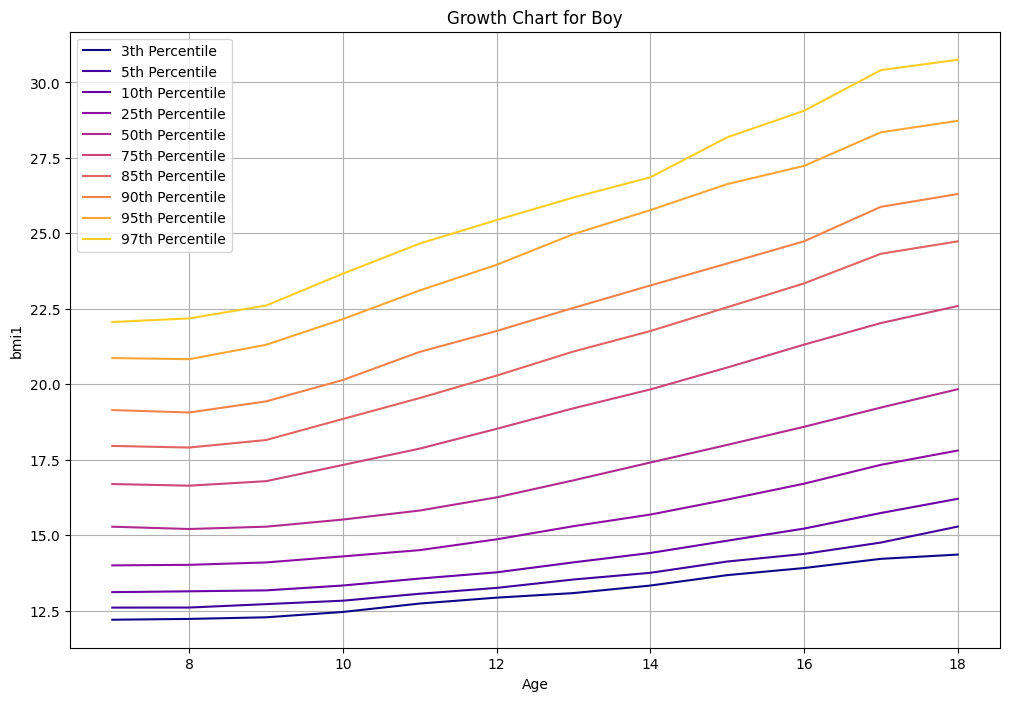

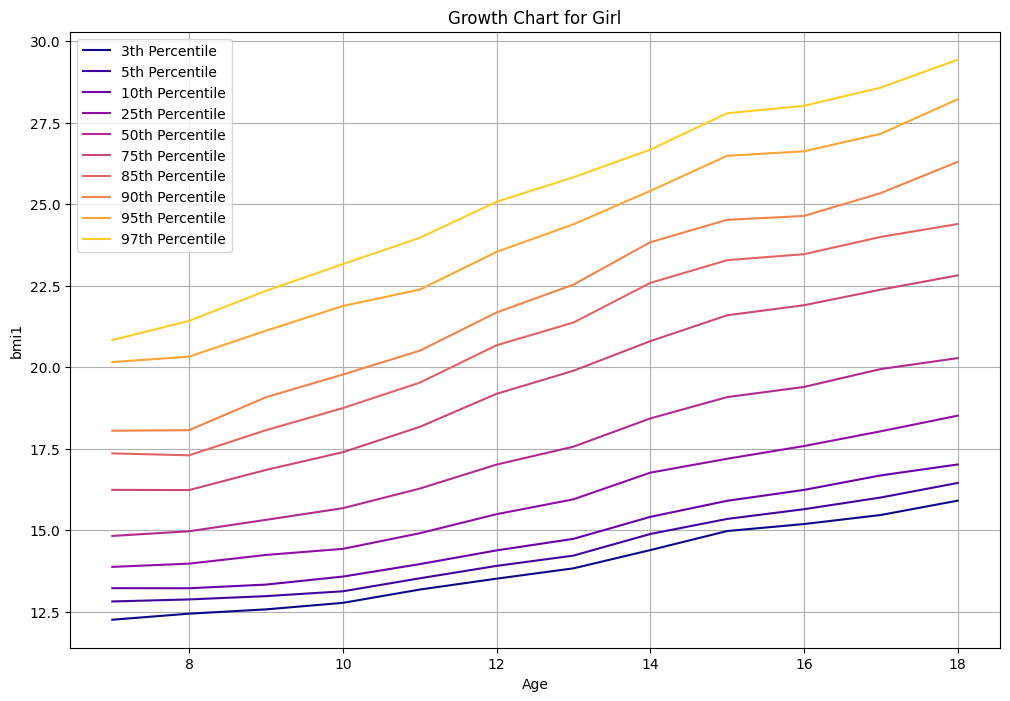

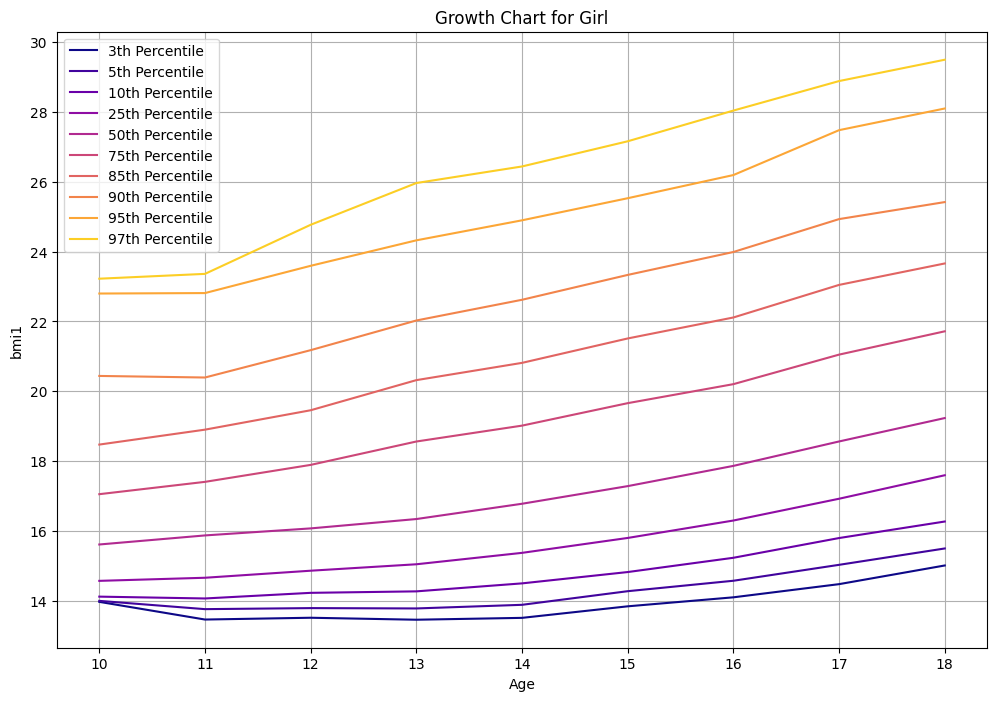

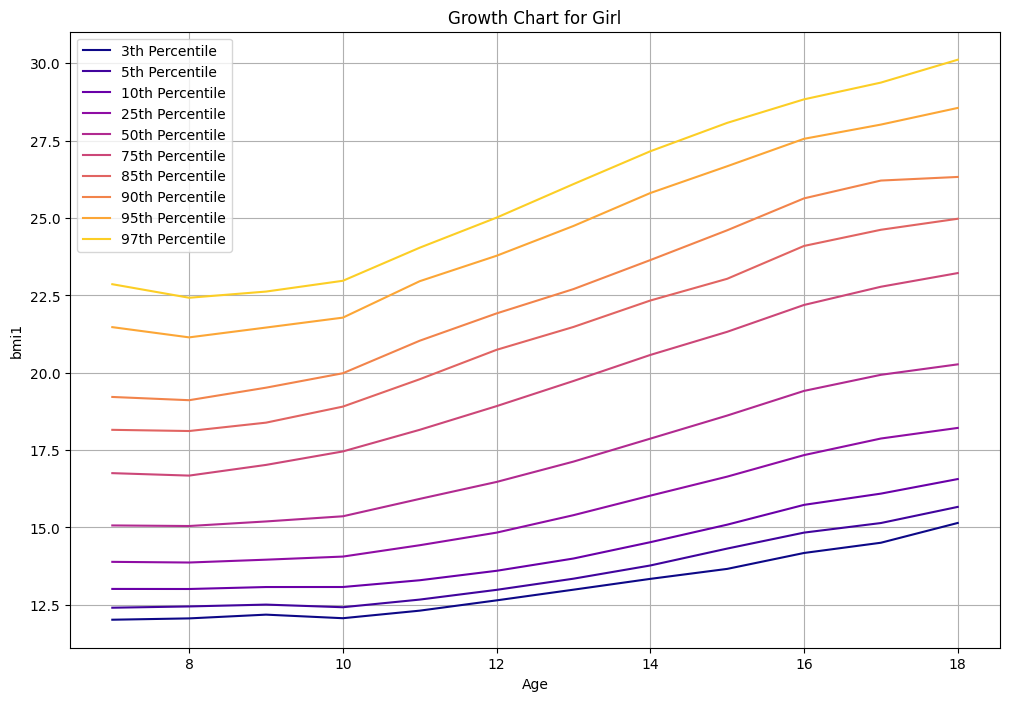

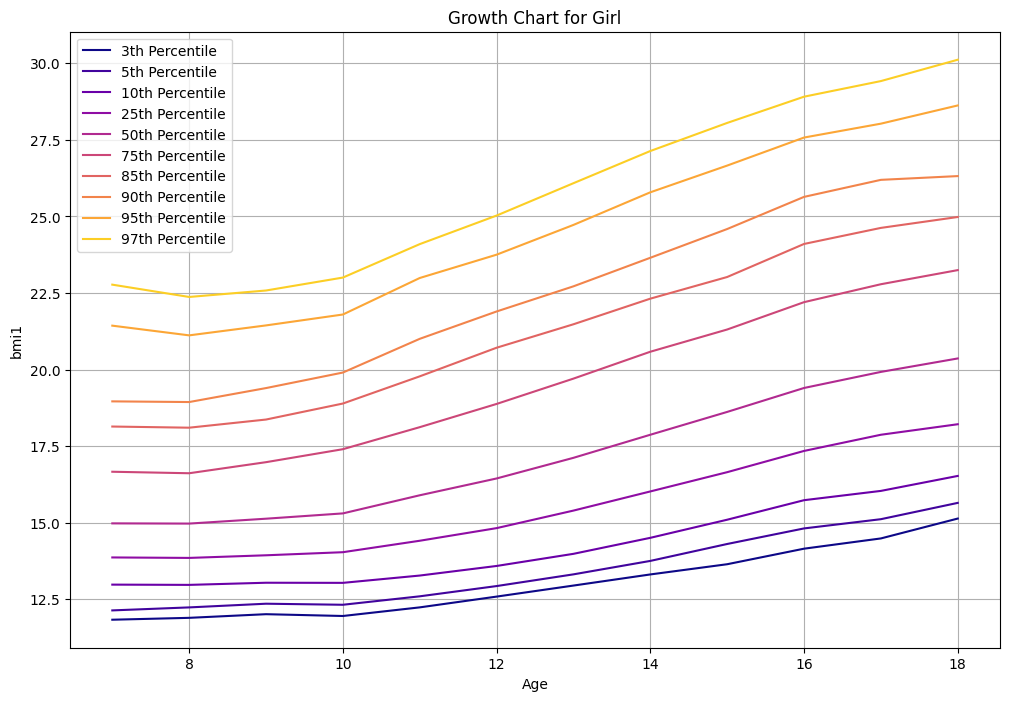

In [30]:
# Define percentiles for each feature
percentile_settings = {
    'height': [3, 5, 10 , 25, 50, 75, 90, 95, 97],  # Percentiles for height
    'weight': [3, 5, 10 , 25, 50, 75, 90, 95, 97],  # Percentiles for weight
    'bmi1': [3, 5, 10 , 25, 50, 75, 85, 90, 95, 97]      # Different percentiles for BMI
}

# Define genders
genders = ['Boy', 'Girl']

# Fraction rate for LOESS smoothing
window_size = 5
# Call the growth_chart function for each combination of feature and gender
for feature, percentiles in percentile_settings.items():
    for gender in genders:
        growth_chart(processed_dfs=processed_dfs, feature=feature, percentiles=percentiles, sex=gender, span= window_size)


In [31]:
# Define percentiles for each feature
percentile_settings = {
    'height': [3, 5, 10 , 25, 50, 75, 90, 95, 97],  # Percentiles for height
    'weight': [3, 5, 10 , 25, 50, 75, 90, 95, 97],  # Percentiles for weight
    'bmi1': [3, 5, 10 , 25, 50, 75, 85, 90, 95, 97]      # Different percentiles for BMI
}

# Define genders
genders = ['Boy', 'Girl']

# Fraction rate for LOESS smoothing
frec_rate = 0.6

# Call the growth_chart function for each combination of feature and gender
for feature, percentiles in percentile_settings.items():
    for gender in genders:
        growth_chart(processed_dfs=processed_dfs, feature=feature, percentiles=percentiles, sex=gender, frec_rate=frec_rate)


TypeError: growth_chart() got an unexpected keyword argument 'frec_rate'

In [ ]:
def replacement_function(df_dict, mappings):
    # Loop over each dataset in the dictionary
    for name, df in df_dict.items():
        # Get the appropriate mapping for each Caspian dataset
        university_to_province = mappings.get(name)
        if university_to_province:
    # Iterate over each DataFrame in df_dict
            for name, df in df_dict.items():
                # Replace values based on the mapping
                df_dict[name] = df.copy()  # Work with a copy if needed
                df_dict[name]['university'] = df_dict[name]['university'].replace(university_to_province)
                
                # Ensure the 'university' column is of type string
                df_dict[name]['university'] = df_dict[name]['university'].astype(str)
                
                # Sort the DataFrame by the 'university' column
                df_dict[name] = df_dict[name].sort_values(by='university', ascending=True)
        
        return df_dict

    # return df_dict

# # Define your mappings dictionary for each Caspian dataset
mappings = {
    'caspian_I': {
        "Gorgan": "Golestan",
        "Mashad": "Razavi Khorasan",
        "ShahidBeheshti": "Tehran",
        "Tabriz": "East Azerbaijan",
        "Yazd": "Yazd",
        "Rasht": "Gilan"
    },
    'caspian_III': {
       "4mahal bakhtyari": "Chaharmahal and Bakhtiari",
        "ardebil": "Ardabil",
        "azar gharbi": "West Azerbaijan",
        "boshehr": "Bushehr",
        "esfahan": "Isfahan",
        "fars": "Fars",
        "gazvin": "Qazvin",
        "gilan": "Gilan",
        "golestan": "Golestan",
        "gom": "Qom",
        "hamedan": "Hamedan",
        "hormozgan": "Hormozgan",
        "ilam": "Ilam",
        "kerman": "Kerman",
        "kermanshah": "Kermanshah",
        "khorasan jonobi": "South Khorasan",
        "khorasan razavi": "Razavi Khorasan",
        "khorasan shomali": "North Khorasan",
        "khozestan": "Khuzestan",
        "kordestan": "Kurdistan",
        "lorestan": "Lorestan",
        "markazi": "Markazi",
        "mazandaran": "Mazandaran",
        "semnan": "Semnan",
        "tehran": "Tehran",
        "yazd": "Yazd",
        "zanjan": "Zanjan"
    },
    'caspian_IV': {
    'charmahal': 'Chaharmahal and Bakhtiari',
    'alborz': 'Alborz',
    'dezful': 'Khuzestan',
    'mazandaran': 'Mazandaran',
    'sabzevar': 'Razavi Khorasan',
    'azar gharbi': 'West Azerbaijan',
    'kurdestan': 'Kurdistan',
    'kerman.jirof': 'Kerman',
    'ardebil': 'Ardabil',
    'hamedan': 'Hamedan',
    'khorasan sho': 'South Khorasan',
    'ilam': 'Ilam',
    'khozestan': 'Khuzestan',
    'shoshtar': 'Khuzestan',
    'qazvin': 'Qazvin',
    'isfahan': 'Isfahan',
    'gilan': 'Gilan',
    'tabriz': 'East Azerbaijan',
    'arak': 'Markazi',
    'semnan': 'Semnan',
    'hormozgan': 'Hormozgan',
    'lorestan': 'Lorestan',
    'boshehr': 'Bushehr',
    'zanjan': 'Zanjan',
    'sistan': 'Sistan and Baluchestan',
    'kermanshah': 'Kermanshah',
    'fars': 'Fars',
    'torbat heida': 'Razavi Khorasan',
    'kerman': 'Kerman',
    'khorasan jon': 'North Khorasan',
    'yazd': 'Yazd',
    'golestan': 'Golestan',
    'behbahan': 'Khuzestan',
    'shahidbehesh': 'Mazandaran',
    'shahrood': 'Semnan',
    'khorasan raz': 'Razavi Khorasan',
    'saveh': 'Markazi',
    'iran': 'General Iran',
    'esfarayen': 'North Khorasan',
    'kohkiloyeh': 'Kohgiluyeh and Boyer-Ahmad',
    'abadan': 'Khuzestan',
    'rafsanjan': 'Kerman',
    'iranshahr': 'Sistan and Baluchestan',
    'babol': 'Mazandaran',
    'torbat jam': 'Razavi Khorasan',
    'zabol': 'Sistan and Baluchestan',
    'kashan': 'Isfahan',
    'jahrom': 'Fars',
    'neishabor': 'Razavi Khorasan',
    'bam': 'Kerman',
    'tehran': 'Tehran',
    'larestan': 'Fars',
    'fasad': 'Fars'
},
    'caspian_V': {
        'tabriz': 'East Azerbaijan',
    # None: 'Unknown',  # Assuming None corresponds to an unknown city
    'azar gharbi': 'West Azerbaijan',
    'ardebil': 'Ardabil',
    'isfahan': 'Isfahan',
    'kashan': 'Isfahan',
    'alborz': 'Alborz',
    'ilam': 'Ilam',
    'boshehr': 'Bushehr',
    'tehran': 'Tehran',
    'Iran': 'General Iran',  # Assuming this is a general reference
    'shahidbeheshti': 'Tehran',  # Assuming it's named after Shahid Beheshti University in Tehran
    'charmahal': 'Chaharmahal and Bakhtiari',
    'khorasan jonobi': 'South Khorasan',
    'torbat heidariyeh': 'Razavi Khorasan',
    'sabzevar': 'Razavi Khorasan',
    'khorasan razavi': 'Razavi Khorasan',
    'neishabor': 'North Khorasan',
    'torbat jam': 'Razavi Khorasan',
    'khorasan shomali': 'North Khorasan',
    'esfarayen': 'North Khorasan',
    'khozestan': 'Khuzestan',
    'Abadan': 'Khuzestan',
    'Behbahan': 'Khuzestan',
    'Dezful': 'Khuzestan',
    'Shoshtar': 'Khuzestan',
    'Zanjan': 'Zanjan',
    'Semnan': 'Semnan',
    'Shahrood': 'Semnan',
    'Zabol': 'Sistan and Baluchestan',
    'Sistan': 'Sistan and Baluchestan',
    'iranshahr': 'Sistan and Baluchestan',
    'jahrom': 'Fars',
    'fars': 'Fars',
    'fasad': 'Fars',
    'larestan': 'Fars',
    'Qazvin': 'Qazvin',
    'Kurdestan': 'Kurdistan',
    'Kerman.jiroft': 'Kerman',
    'Rafsanjan': 'Kerman',
    'Kerman': 'Kerman',
    'Bam': 'Kerman',
    'kermanshah': 'Kermanshah',
    'Kohkiloyeh': 'Kohgiluyeh and Boyer-Ahmad',
    'Golestan': 'Golestan',
    'Gilan': 'Gilan',
    'Lorestan': 'Lorestan',
    'Babol': 'Mazandaran',
    'Mazandaran': 'Mazandaran',
    'Arak': 'Markazi',
    'saveh': 'Markazi',
    'Hormozgan': 'Hormozgan',
    'Hamedan': 'Hamedan',
    'Yazd': 'Yazd'
    }
}

# Apply the function to the entire dictionary
processed_dfs = replacement_function(processed_dfs, mappings)



/tmp/ipykernel_197676/645573977.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_dict[name]['university'] = df_dict[name]['university'].replace(university_to_province)


In [ ]:
def feature_per_city(df_dict, age, feature):
    # Set a custom color palette
    palette = sns.color_palette('tab10', 2)
    custom_palette = {'Boy': palette[0], 'Girl': palette[1]}

    # Define the folder to save plots
    save_folder = 'charts/analysis_based_city'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    for name, df in df_dict.items():
        # print(f"Processing dataset: {name}")
        
        df_filtered = df[df['age'] == age]
        
        if df_filtered.empty:
            # print(f"No data for age {age} in dataset {name}")
            continue

        df_filtered[feature] = pd.to_numeric(df_filtered[feature], errors='coerce')
        
        # Increase figure size for better readability
        plt.figure(figsize=(12, 9))
        
        # Create the boxplot
        sns.boxplot(x='university', y=feature, hue='sex', data=df_filtered, palette=custom_palette) 
        plt.title(f'{feature} Distribution by City and Sex for {age} years old in {name}')
        plt.xticks(rotation=90)
        
        # Limit y-axis ticks and round values
        min_val, max_val = df_filtered[feature].min(), df_filtered[feature].max()
        plt.yticks(np.linspace(min_val, max_val, 8).round(2))
        
        # Calculate sample sizes and maximum values for each box to position annotations above the boxes
        counts = df_filtered.groupby(['university', 'sex']).size().unstack().fillna(0)
        max_vals = df_filtered.groupby(['university', 'sex'])[feature].max().unstack()
        
        # Annotate each box with sample sizes, placing text slightly above the maximum whisker value
        for i, university in enumerate(counts.index):
            for j, sex in enumerate(counts.columns):
                count = counts.loc[university, sex]
                max_val = max_vals.loc[university, sex]
                
                # Adjust text position above each boxplot
                y_offset = max_val * 1.05  # Adjust this multiplier as needed to control vertical spacing
                x_offset = -0.15 if sex == 'Girl' else 0.15  # Slight horizontal offset for parallel alignment
                plt.text(i + x_offset, y_offset, f'n={int(count)}', ha='center', va='bottom', 
                         color=custom_palette[sex], rotation=90, fontsize=10)

        # Adjust layout to prevent cutting off labels
        plt.tight_layout()

        # Save the plot instead of showing it
        plot_path = os.path.join(save_folder, f"{name}_{feature}_age-{age}.png")
        plt.savefig(plot_path)
        plt.close()  # Close the figure to free up memory
        # print(f"Saved plot to {plot_path}")

# Usage
features=['weight','height','bmi1']
for i in range(len(features)):
    feature_per_city(processed_dfs, 18, f'{features[i]}')


/tmp/ipykernel_197676/1966959181.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[feature] = pd.to_numeric(df_filtered[feature], errors='coerce')
/tmp/ipykernel_197676/1966959181.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_filtered.groupby(['university', 'sex']).size().unstack().fillna(0)
/tmp/ipykernel_197676/1966959181.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

In [ ]:
def plot_region_distribution(df_dict,feature):
    """
    Plots the weight distribution by age, gender, and region for ages 7 to 18.
    
    Parameters:
    - df_dict (dict): A dictionary of DataFrames, where each key corresponds to a specific dataset.
    - dataset_key (str): The key in df_dict for the dataset you want to plot.
    """
    save_folder = 'charts/analysis_based_region'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    for name,df in df_dict.items():
        # Convert height to numeric if needed (assuming this was intended for weight)
        df[f'{feature}'] = pd.to_numeric(df[f'{feature}'], errors='coerce')

        # Plot weight for each gender by region
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df, x='age', y=f'{feature}', hue='sex', style='region', markers=True)

        # Customize plot
        plt.title( f'{feature} Distribution by Sex and Region (Ages 7-18) in {name}')
        plt.xlabel("Age")
        plt.ylabel(f'{feature}')
        plt.legend(title="Region and Gender")
        plt.grid(True)
        plot_path = os.path.join(save_folder, f"{name}_{feature}_based_region.png")
        plt.savefig(plot_path)
        plt.close()
        # plt.show()


features=['weight','height','bmi1']
for i in range(len(features)):
    plot_region_distribution(processed_dfs, f'{features[i]}')


chart based on school type

In [ ]:
def plot_based_schooltype(df_dict,feature):
    """
    Plots the weight distribution by age, gender, and region for ages 7 to 18.
    
    Parameters:
    - df_dict (dict): A dictionary of DataFrames, where each key corresponds to a specific dataset.
    - dataset_key (str): The key in df_dict for the dataset you want to plot.
    """
    save_folder = 'charts/analysis_based_schooltype'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    for name,df in df_dict.items():
        # Convert height to numeric if needed (assuming this was intended for weight)

        df = df[(df['schoolType'] != 'Unknown')]
        df[f'{feature}'] = pd.to_numeric(df[f'{feature}'], errors='coerce')

        # Plot weight for each gender by region
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df, x='age', y=f'{feature}', hue='sex', style='schoolType', markers=True)

        # Customize plot
        plt.title( f'{feature} Distribution by Sex and schoolType (Ages 7-18) in {name}')
        plt.xlabel("Age")
        plt.ylabel(f'{feature}')
        plt.legend(title="School Type and Gender")
        plt.grid(True)
        plot_path = os.path.join(save_folder, f"{name}_{feature}_based_schoolType.png")
        plt.savefig(plot_path)
        plt.close()
        # plt.show()


features=['weight','height','bmi1']
for i in range(len(features)):
    plot_based_schooltype(processed_dfs, f'{features[i]}')


/tmp/ipykernel_197676/2078114015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}'] = pd.to_numeric(df[f'{feature}'], errors='coerce')
/tmp/ipykernel_197676/2078114015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}'] = pd.to_numeric(df[f'{feature}'], errors='coerce')
/tmp/ipykernel_197676/2078114015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats